In [1]:
# Send request to vertex endpoint using SDK

In [2]:
REGION='us-central1'
ENDPOINT_ID='7289542189829324800'
PROJECT_ID='mitochondrion-project-344303'
FILENAME='../maksssksksss0.png'

In [3]:
import base64

from google.cloud import aiplatform
from google.cloud.aiplatform.gapic.schema import predict


def predict_image_object_detection_sample(
    project: str,
    endpoint_id: str,
    filename: str,
    location: str,
):
    api_endpoint = location + "-aiplatform.googleapis.com"
    client_options = {"api_endpoint": api_endpoint}
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    
    with open(filename, "rb") as f:
        file_content = f.read()
    encoded_content = base64.b64encode(file_content).decode("utf-8")
    instance = predict.instance.ImageObjectDetectionPredictionInstance(
        content=encoded_content,
    ).to_value()
    instances = [instance]

    parameters = predict.params.ImageObjectDetectionPredictionParams(
        confidence_threshold=0.5, max_predictions=5,
    ).to_value()
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )

    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    
    
    predictions = response.predictions
    for prediction in predictions:
        print(" prediction:", dict(prediction))

    return response

In [4]:
response = predict_image_object_detection_sample(
    project=PROJECT_ID,
    endpoint_id=ENDPOINT_ID,
    filename=FILENAME,
    location=REGION
)

response
 deployed_model_id: 6835575828953169920
 prediction: {'bboxes': [[0.362162948, 0.44054687, 0.273661762, 0.398460865], [0.150216684, 0.213940933, 0.289538383, 0.381614894], [0.628631175, 0.709182322, 0.261499316, 0.390485585]], 'ids': ['2547656952243027968', '7159342970670415872', '7159342970670415872'], 'displayNames': ['with_mask', 'without_mask', 'without_mask'], 'confidences': [0.99946934, 0.891523063, 0.891168356]}


In [5]:
# display prediction result

In [6]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches

In [7]:
def plot_response(img_filename, prediction):

    img = cv2.imread(img_filename)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    _, ax = plt.subplots(figsize=(12, 12))

    for label, bbox in zip(prediction['displayNames'], prediction['bboxes']):
        print(label, bbox)
        x_min = int(bbox[0] * img.shape[1])
        x_max = int(bbox[1] * img.shape[1])
        y_min = int(bbox[2] * img.shape[0])
        y_max = int(bbox[3] * img.shape[0])

        ax.add_patch(patches.Rectangle((x_min,y_min), x_max-x_min, y_max-y_min, fill=False, edgecolor='red', lw=2))
        ax.text(x_min, (y_min-0), str(label), verticalalignment='top',
        backgroundcolor='red', fontsize=10, weight='bold', color='white')

    ax.imshow(img)

with_mask [0.362162948, 0.44054687, 0.273661762, 0.398460865]
without_mask [0.150216684, 0.213940933, 0.289538383, 0.381614894]
without_mask [0.628631175, 0.709182322, 0.261499316, 0.390485585]


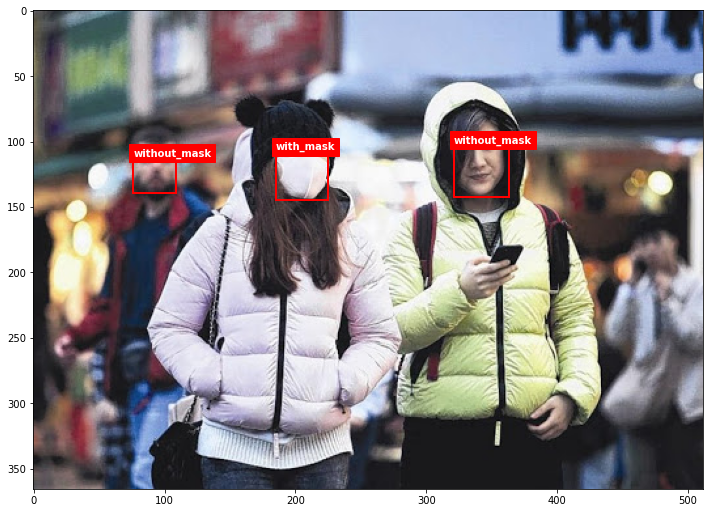

In [8]:
prediction = dict(response.predictions[0])

plot_response(FILENAME, prediction)